<a href="https://colab.research.google.com/github/adityap27/mnist-ann/blob/master/mnit_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.) Data Preprocessing**

In [1]:
#importing libraries 
from keras.datasets import mnist
import numpy as np

# Importing the dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#fixing shapes
X_train=np.expand_dims(X_train,3)
X_test=np.expand_dims(X_test,3)
y_train=y_train.reshape((y_train.shape[0],1)) #flattening
y_test=y_test.reshape((y_test.shape[0],1))

#Encoding of categorical data to one-hot format
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(sparse=False)
y_train=onehotencoder.fit_transform(y_train)
y_test=onehotencoder.transform(y_test)

# Splitting the Training into the Training set and Validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.175, random_state = 0)

#Feature Scaling
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

d:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


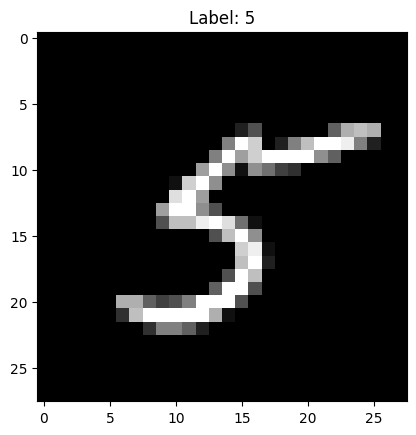

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28,28),cmap='gray')
plt.title("Label: "+str(np.argmax(y_train[0])))
plt.show()

# **2.) Build and Train CNN**

In [3]:
#CNN

#import libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPool2D,Flatten

In [4]:
#Build CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=1,activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=1,activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),strides=1,padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(64,kernel_size=(3,3),strides=1,padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax',kernel_initializer='glorot_normal'))

#Compiling model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

In [5]:
#Training model

history=model.fit(X_train,y_train,epochs=1,batch_size=64,validation_data=(X_val,y_val),verbose=1,use_multiprocessing=True)



774/774 [==============================] - 59s 73ms/step - loss: 0.2194 - accuracy: 0.9322 - val_loss: 0.0455 - val_accuracy: 0.9844


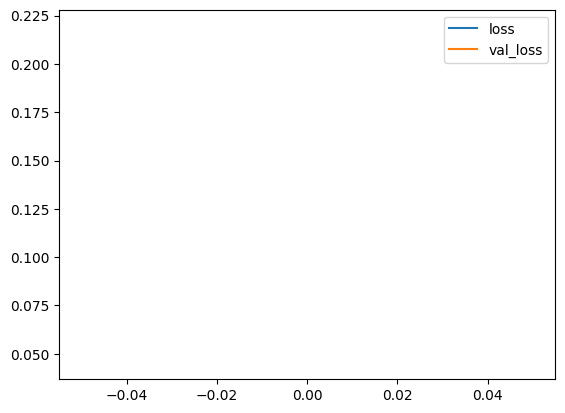

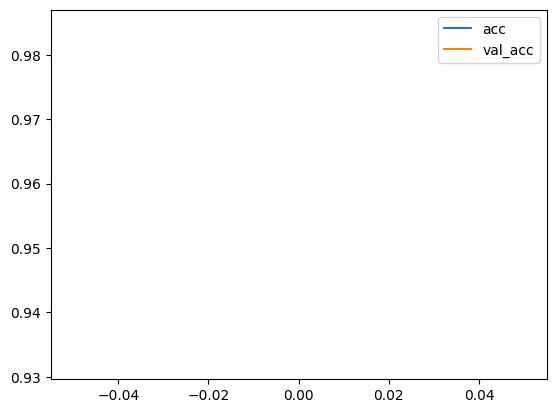

In [6]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [7]:
train=model.evaluate(X_train,y_train)
print(train)

1547/1547 [==============================] - 17s 11ms/step - loss: 0.0427 - accuracy: 0.9873
[0.042719438672065735, 0.9872929453849792]


In [8]:
val=model.evaluate(X_val,y_val)
print(val)

329/329 [==============================] - 4s 11ms/step - loss: 0.0455 - accuracy: 0.9844
[0.045502617955207825, 0.9843809604644775]


In [9]:
print(100*(1-train[1]))
print(100*(train[1]-val[1]))

1.2707054615020752
0.2911984920501709


# **3.) Evaluation on Test set**

In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0411 - accuracy: 0.9865


[0.041117534041404724, 0.9865000247955322]

In [11]:
X_test[0].shape

(28, 28, 1)

In [12]:
X_test[0].squeeze().shape

(28, 28)

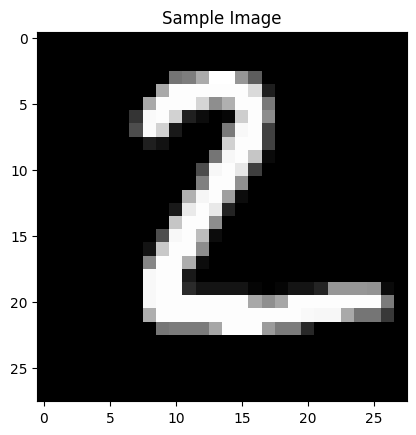

1/1 [==============================] - 0s 194ms/step
Predicted Class: 2


In [13]:
sample_image = X_test[1]

# Display the image
plt.imshow(sample_image.squeeze(), cmap='gray')  # Squeeze is used to remove single-dimensional entries from the shape
plt.title("Sample Image")
plt.show()

# Prepare the image for prediction (if necessary, depends on how your model was trained)
# Ensure it's the same shape as your training data, e.g., (1, 28, 28, 1)
sample_image = np.expand_dims(sample_image, axis=0)

# Make a prediction
prediction = model.predict(sample_image)

# Convert prediction to a readable label if necessary
predicted_label = np.argmax(prediction, axis=1)

# Display the prediction
print(f"Predicted Class: {predicted_label[0]}")

In [15]:
pred = model.predict(sample_image)

1/1 [==============================] - 0s 33ms/step


In [16]:
answer=np.argmax(pred,axis=1)

In [20]:
answer[0]

2